In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
from sklearn.metrics import explained_variance_score
import matplotlib as mpl

In [7]:
diff_corr_array = np.empty((5,4))
nona_corr_array = np.empty((5,4))
soma_diff_corr_array = np.empty((5,4))
soma_nona_corr_array = np.empty((5,4))


for i in range(5):
    gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["sub_out"][-20:,:].transpose([1,0,2]).reshape(5,-1)
    gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["sub_out"][-20:,:].transpose([1,0,2]).reshape(5,-1)
    true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set"+str(i+1)+".npy").reshape(4,1000,50001)[:,-20:,:50000].reshape(4,-1)
    true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set"+str(i+1)+".npy").reshape(4,1000,50001)[:,-20:,:50000].reshape(4,-1)
    true4_dend = true4_dend_na - true4_dend_nona
    true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
    gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)
    gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)
    diff_C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
    diff_C_syn_e = np.argmax(diff_C_syn_e, 0)
    nona_C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
    nona_C_syn_e = np.argmax(nona_C_syn_e, 0)
    diff_soma = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set"+str(i+1)+".npy")[-50000*20:]
    nona_soma = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set"+str(i+1)+".npy")[-20:,:50000].flatten()
    
    for j in range(4):
        diff_sub_idx = scipy.stats.mode(diff_C_syn_e[880+j*60:880+(j+1)*60]).mode.item()
        nona_sub_idx = scipy.stats.mode(nona_C_syn_e[880+j*60:880+(j+1)*60]).mode.item()
        print(diff_sub_idx)
        #for k in range(5):
            #diff_corr_array[i,j,k] = np.corrcoef(true4_dend[j], gru4_diff_subout[k])[0][1]
            #nona_corr_array[i,j,k] = np.corrcoef(true4_dend_nona[j], gru4_nona_subout[k])[0][1]
        diff_corr_array[i,j] = np.corrcoef(true4_dend[j], gru4_diff_subout[diff_sub_idx])[0][1]
        nona_corr_array[i,j] = np.corrcoef(true4_dend_nona[j], gru4_nona_subout[diff_sub_idx])[0][1]
        
        soma_diff_corr_array[i,j] = np.corrcoef(true4_dend[j], diff_soma)[0][1]
        soma_nona_corr_array[i,j] = np.corrcoef(true4_dend_nona[j], nona_soma)[0][1]
        
    print("---------")

0
4
2
0
---------
3
2
3
3
---------
3
3
0
2
---------
0
1
4
0
---------
0
2
3
0
---------


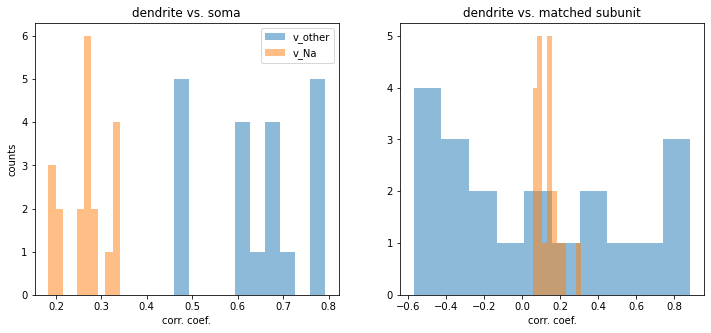

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))

axs[0].hist(soma_nona_corr_array.flatten(), alpha=0.5, label="v_other")
axs[0].hist(soma_diff_corr_array.flatten(), alpha=0.5, label="v_Na")
axs[0].legend()
axs[0].set_title("dendrite vs. soma")
axs[0].set_xlabel("corr. coef.")
axs[0].set_ylabel("counts")

axs[1].hist(nona_corr_array.flatten(), alpha=0.5, label="v_other")
axs[1].hist(diff_corr_array.flatten(), alpha=0.5, label="v_Na")
axs[1].set_title("dendrite vs. matched subunit")
axs[1].set_xlabel("corr. coef.")

plt.show()

In [3]:
gru4_diff_subout = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
gru4_nona_subout = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["sub_out"][-1,:]
true4_dend_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").reshape(4,1000,50001)[:,-1,:50000]
true4_dend = true4_dend_na - true4_dend_nona
true4_dend_nona = true4_dend_nona - np.mean(true4_dend_nona, 1).reshape(-1,1)
gru4_nona_subout -= np.mean(gru4_nona_subout, 1).reshape(-1,1)
gru4_diff_subout -= np.mean(gru4_diff_subout, axis=1).reshape(-1,1)

In [4]:
C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set1.npz")["C_syn_e"]
C_syn_e = np.argmax(C_syn_e, 0)
print(scipy.stats.mode(C_syn_e[880:940]))
print(scipy.stats.mode(C_syn_e[940:1000]))
print(scipy.stats.mode(C_syn_e[1000:1060]))
print(scipy.stats.mode(C_syn_e[1060:1120]))

ModeResult(mode=array([3]), count=array([60]))
ModeResult(mode=array([3]), count=array([59]))
ModeResult(mode=array([0]), count=array([60]))
ModeResult(mode=array([3]), count=array([52]))


In [5]:
C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set1.npz")["C_syn_e"]
C_syn_e = np.argmax(C_syn_e, 0)
print(scipy.stats.mode(C_syn_e[880:940]))
print(scipy.stats.mode(C_syn_e[940:1000]))
print(scipy.stats.mode(C_syn_e[1000:1060]))
print(scipy.stats.mode(C_syn_e[1060:1120]))

ModeResult(mode=array([0]), count=array([60]))
ModeResult(mode=array([4]), count=array([60]))
ModeResult(mode=array([2]), count=array([45]))
ModeResult(mode=array([0]), count=array([60]))
